Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

In this section, I want to obtain two securities that have little correlation with each other.
I think that gold and S&P500 should have little positive or even negative correlation

In [2]:
tickers = ['GLD','VTI']
yfin.pdr_override() #  you ensure compatibility with the Yahoo Finance API changes and possibly improve the reliability and functionality of data retrieval from Yahoo Finance within your code
data = pd.DataFrame()
for t in tickers:
    data[t] = pdr.get_data_yahoo(t, start="2012-1-1", end="2024-3-23")['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,GLD,VTI
Date,,
2012-01-03,155.919998,52.435890
2012-01-04,156.710007,52.460026
2012-01-05,157.779999,52.693203
2012-01-06,157.199997,52.572590
2012-01-09,156.500000,52.693203


In [4]:
data.tail()

,GLD,VTI
Date,,
2024-03-18,200.029999,255.000000
2024-03-19,199.800003,256.470001
2024-03-20,202.179993,259.070007
2024-03-21,201.970001,260.140015
2024-03-22,200.350006,258.500000


Daily retrun

In [5]:
simple_return_d = data/data.shift(1)-1

Annual return

In [6]:
simple_return_y = simple_return_d * 250

In [7]:
simple_return_y.head()

,GLD,VTI
Date,,
2012-01-03,NaN,NaN
2012-01-04,1.266689,0.115072
2012-01-05,1.706962,1.111214
2012-01-06,-0.919004,-0.572242
2012-01-09,-1.113227,0.573555


In [8]:
simple_return_y.tail()

,GLD,VTI
Date,,
2024-03-18,0.400571,1.271130
2024-03-19,-0.287452,1.441178
2024-03-20,2.977965,2.534415
2024-03-21,-0.259659,1.032547
2024-03-22,-2.005242,-1.576088


In [9]:
simple_return_y[np.isnan(simple_return_y)] = 0
simple_return_y

,GLD,VTI
Date,,
2012-01-03,0.000000,0.000000
2012-01-04,1.266689,0.115072
2012-01-05,1.706962,1.111214
2012-01-06,-0.919004,-0.572242
2012-01-09,-1.113227,0.573555
...,...,...
2024-03-18,0.400571,1.271130
2024-03-19,-0.287452,1.441178
2024-03-20,2.977965,2.534415


In [10]:
avg_return = (simple_return_y).mean()
print('average annual return:\n',avg_return)

average annual return:
 GLD    0.031384
VTI    0.144123
dtype: float64


In [11]:
variance = (simple_return_y).var()
print('variance of annual return:\n',variance)

variance of annual return:
 GLD    5.486694
VTI    7.166522
dtype: float64


In [12]:
std_d = (simple_return_y).std()
print('std deviation of annual return:\n',std_d)

std deviation of annual return:
 GLD    2.342369
VTI    2.677036
dtype: float64


In [13]:
covar = (simple_return_y).cov()
print('covariance of annual return:\n',covar)

covariance of annual return:
           GLD       VTI
GLD  5.486694  0.291302
VTI  0.291302  7.166522


In [14]:
correlation = (simple_return_y).corr()
print('correlation matrix for two securities:\n',correlation)
cor=correlation.loc[tickers[0]][tickers[1]]
print('correlation between two securities: ', cor)

correlation matrix for two securities:
           GLD       VTI
GLD  1.000000  0.046455
VTI  0.046455  1.000000
correlation between two securities:  0.04645518871355402


assign random weight

In [15]:
RW = np.random.random(len(tickers)) # two random number that should be normalized
w = RW/sum(RW)
w # weight of each security

array([0.54709226, 0.45290774])

Expected portfolio retrun

In [16]:
np.sum(w * avg_return)

0.08244402817576682

Expected portfolio volatility

In [17]:
np.sqrt(np.dot(w.T,np.dot(covar,w)))

1.8046099491272298

portfolio retrun and volatility simulation

In [18]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    RW = np.random.random(len(tickers)) # two random number that should be normalized
    w = RW/sum(RW)
    pfolio_returns.append(np.sum(w * avg_return))
    pfolio_volatilities.append(np.sqrt(np.dot(w.T,np.dot(covar,w))))

pfolio_returns, pfolio_volatilities

([0.08699785997975223,
  0.03903542167157768,
  0.09898459321278136,
  0.08993392439719387,
  0.09172270412191669,
  0.1218049953466847,
  0.08338735094828974,
  0.03889953403134793,
  0.07123213647558008,
  0.09716612592900471,
  0.11400470136662653,
  0.07189759885296046,
  0.13079691587541276,
  0.06996804423007594,
  0.09887799277175528,
  0.11749814932583058,
  0.11346683027180388,
  0.07391241201165384,
  0.06459804185932443,
  0.11402228143057529,
  0.03438797109732249,
  0.10575439458020344,
  0.07168548752276557,
  0.0838683538697884,
  0.10474112969497737,
  0.1128929040155146,
  0.11757757613651197,
  0.1392812063648487,
  0.04846931866392322,
  0.11193489971500953,
  0.1257495113173674,
  0.050884735358244365,
  0.05220944879502399,
  0.06214223419575523,
  0.07460246957937816,
  0.0688958623018718,
  0.08952219962722313,
  0.09044741347325413,
  0.05825584954422919,
  0.08161507682479226,
  0.08502788832919982,
  0.13089758188310718,
  0.09161720752294865,
  0.095409668176

In [19]:
#pfolio_returns = np.array(pfolio_returns)
#pfolio_volatilities = np.array(pfolio_volatilities)

Text(0, 0.5, 'Expected Return')

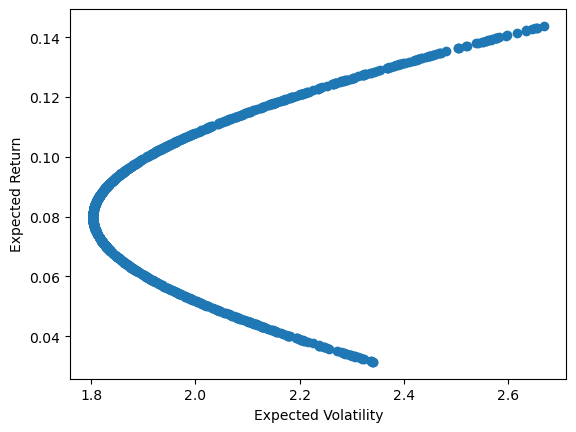

In [20]:
plt.plot(pfolio_volatilities, pfolio_returns,'o')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')